# Relationship between HDI & Height

In [25]:
# HDI (or Human Development Index) consists of 3 main components: economy (GNI/capita), education (years of schooling) and health (life expectancy).

# This project is to analyze the relationship between HDI (or indirectly: economy, education and health) and mean male height across the world.

Source of Data: **<a href="https://www.kaggle.com/datasets/programmerrdai/human-height" target="_blank">Kaggle</a>**

**1) Importing Libraries**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

**2) Observing our Dataset**

In [34]:
df = pd.read_csv('human_development_index_vs_mean_male_height.csv')
df

,entity,code,year,HDI_(UNDP),mean_male_height_(cm),continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1980,0.228,165.381291,Asia
2,Afghanistan,AFG,1985,0.273,165.397122,Asia
3,Afghanistan,AFG,2002,0.373,NaN,Asia
4,Afghanistan,AFG,2003,0.383,NaN,Asia
...,...,...,...,...,...,...
24880,Zimbabwe,ZWE,1986,NaN,170.402765,Africa
24881,Zimbabwe,ZWE,1987,NaN,170.243318,Africa
24882,Zimbabwe,ZWE,1988,NaN,170.073876,Africa
24883,Zimbabwe,ZWE,1989,NaN,169.896967,Africa


In [24]:
# Explanation of each columns:

## 'entity'                 : country
## 'code'                   : country code
## 'year'                   : the year that the data was recorded
## 'HDI_(UNDP)'             : HDI data from the UNDP (United Nations Development Programme)
## 'mean_male_height_(cm)'  : the mean male height measured in cm
## 'continent'              : continent of the country

**3) Describing our Dataset (rounded to 3 decimal places, only HDI & height columns)**

In [35]:
df_0 = df.copy() # make a copy so we can go back to the original dataset if needed

df_1 = df_0.drop(columns=['entity','code','year','continent']) # we only need data from HDI and height
df_1.describe().round(3)

,HDI_(UNDP),mean_male_height_(cm)
count,5001.000,21008.000
mean,0.652,168.327
std,0.167,5.225
min,0.190,152.885
25%,0.524,164.574
50%,0.677,168.315
75%,0.781,171.635
max,0.953,182.567


**4) Data Cleaning #1: Dropping Null Values**

In [36]:
df_2 = df_1.dropna()
df_2

,HDI_(UNDP),mean_male_height_(cm)
1,0.228,165.381291
2,0.273,165.397122
119,0.625,174.100418
120,0.623,173.963038
121,0.645,173.717861
...,...,...
24766,0.481,169.340762
24767,0.476,169.152276
24768,0.473,168.963595
24769,0.467,168.774934


**5) Data Cleaning #2: Finding Outliers using Interquartile Range (IQR) Method**

In [37]:
def find_outliers_IQR(df_2):

   q1 = df_2.quantile(0.25)
   q3 = df_2.quantile(0.75)
   IQR = q3-q1

   lower_limit = q1 - 1.5*IQR
   upper_limit = q3 + 1.5*IQR

   outliers = df_2[(df_2 < lower_limit) | (df_2 > upper_limit)]

   return outliers

find_outliers_IQR(df_2).count()

HDI_(UNDP)               0
mean_male_height_(cm)    0
dtype: int64

In [23]:
# According to the IQR method, we don't have any outliers on our data, so we can keep using df_2.

**6) Describing our Cleaned Dataset (rounded to 3 decimal places)**

In [38]:
df_2.describe().round(3)

,HDI_(UNDP),mean_male_height_(cm)
count,1221.000,1221.000
mean,0.597,171.582
std,0.167,5.260
min,0.190,159.887
25%,0.468,167.563
50%,0.624,171.239
75%,0.728,175.821
max,0.888,182.567


**7) Finding the Correlation between Both Variables (rounded to 3 decimal places)**

In [39]:
correlations = df_2.corr()
correlations['mean_male_height_(cm)'].round(3)

HDI_(UNDP)               0.721
mean_male_height_(cm)    1.000
Name: mean_male_height_(cm), dtype: float64

In [22]:
# This shows the correlation coef. between HDI & height is 0.721, demonstrating a strong positive relationship between both variables.

**8) Data Visualization on a Scatterplot**

<AxesSubplot:title={'center':'Scatterplot of HDI and Mean Height'}, xlabel='HDI_(UNDP)', ylabel='mean_male_height_(cm)'>

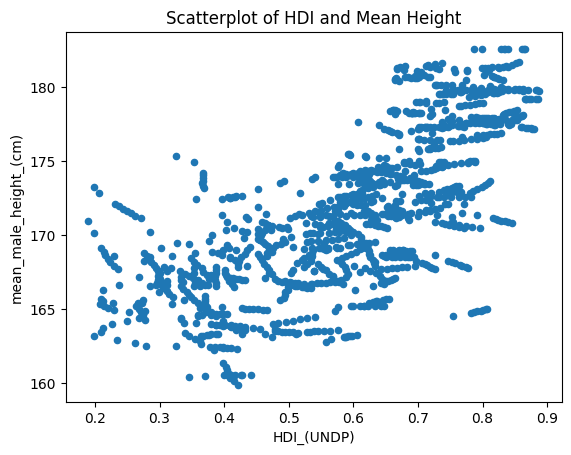

In [40]:
x = 'HDI_(UNDP)'
y = 'mean_male_height_(cm)'

df_2.plot.scatter(x, y, title='Scatterplot of HDI and Mean Height')

**9) Data Visualization on a Scatterplot (with the Line of Best Fit)**

Text(0.5, 1.0, 'Scatterplot of HDI and Male Height')

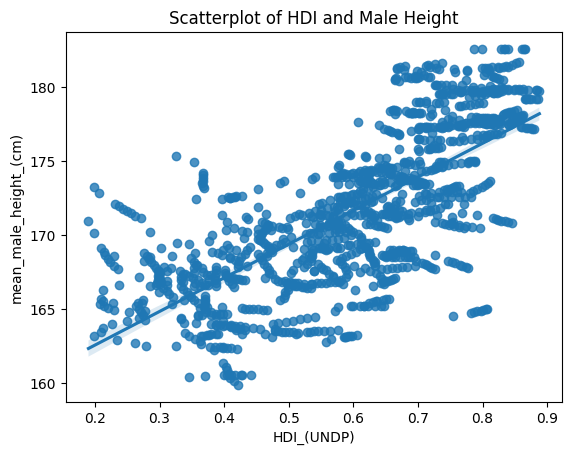

In [41]:
sns.regplot(x='HDI_(UNDP)', y='mean_male_height_(cm)', data=df_2)
plt.title("Scatterplot of HDI and Male Height")

**10) Using the Simple Linear Regression Model to Describe the Relationship between Both Variables (with OLS Method)**

In [42]:
x = df_2['HDI_(UNDP)']
y = df_2['mean_male_height_(cm)']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     mean_male_height_(cm)   R-squared:                       0.519
Model:                               OLS   Adj. R-squared:                  0.519
Method:                    Least Squares   F-statistic:                     1316.
Date:                   Mon, 10 Oct 2022   Prob (F-statistic):          4.64e-196
Time:                           04:26:43   Log-Likelihood:                -3312.0
No. Observations:                   1221   AIC:                             6628.
Df Residuals:                       1219   BIC:                             6638.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.0251 

In [32]:
# ANALYSIS

## F-crit = ~6.66 (df1=1; df2=1219; α=1%), and F-stat > F-crit, meaning that this regression model is statistically significant to 1%.

## The R-squared shows that 51.9% of the variance of height can be explained by the variance of HDI.

## The coef. of HDI_(UNDP) demonstrates that an increase of HDI by 1 unit will increase height by 22.6991 cm.
## The constant coef. theoretically shows that when HDI is zero, height will equal to 158.0251 cm.*

## The p-value or P>|t| of HDI_(UNDP) is less than 0.01, meaning that HDI is statistically significant at 1%.

### *empirically, HDI is never zero